In [11]:
import os
import os.path as osp
import mmcv
import numpy as np
import matplotlib.pyplot as plt
import sys
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visualization_utils import *
from debug_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from visdrone.utils.test_augs import *
from mmdet.datasets import get_dataset
from mmdet.datasets import extra_aug

In [13]:
cfg = 'visdrone/configs/ssd300_debug.py'
cfg = mmcv.Config.fromfile(cfg)
ds = get_dataset(cfg.data.train).dataset

idx = 0
img_info = ds.img_infos[idx]
# load image
img = mmcv.imread(osp.join(ds.img_prefix, img_info['filename']))
ann = ds.get_ann_info(idx)
gt_bboxes = ann['bboxes']
gt_labels = ann['labels']

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load_annotations time: 0.0s from /tmp/visdrone-debug/annotations_debug.json


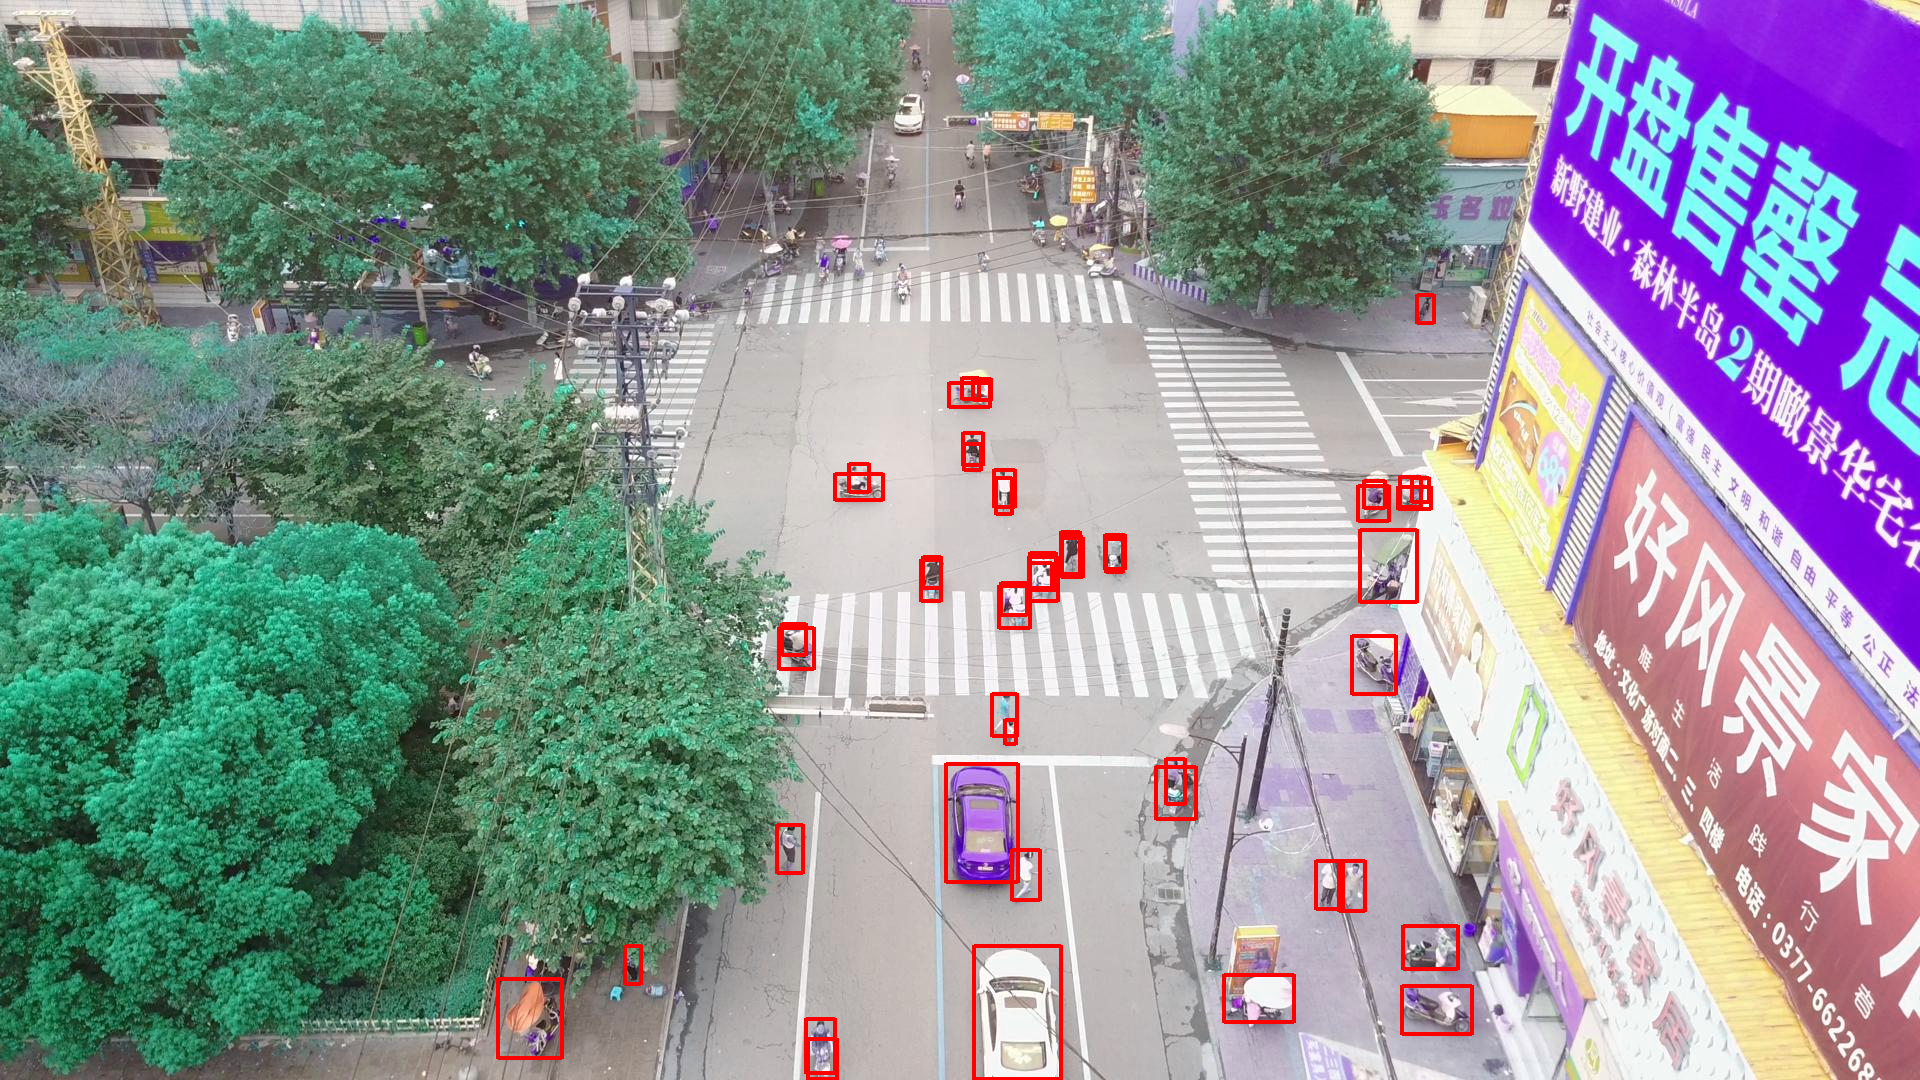

In [14]:
swap = lambda b: np.stack([b[:, 1], b[:, 0], b[:, 3], b[:, 2]], 1)
ret = draw_bounding_boxes_on_image_array(img, boxes=swap(gt_bboxes))
visualize_image_array(ret)

# RandomPatch

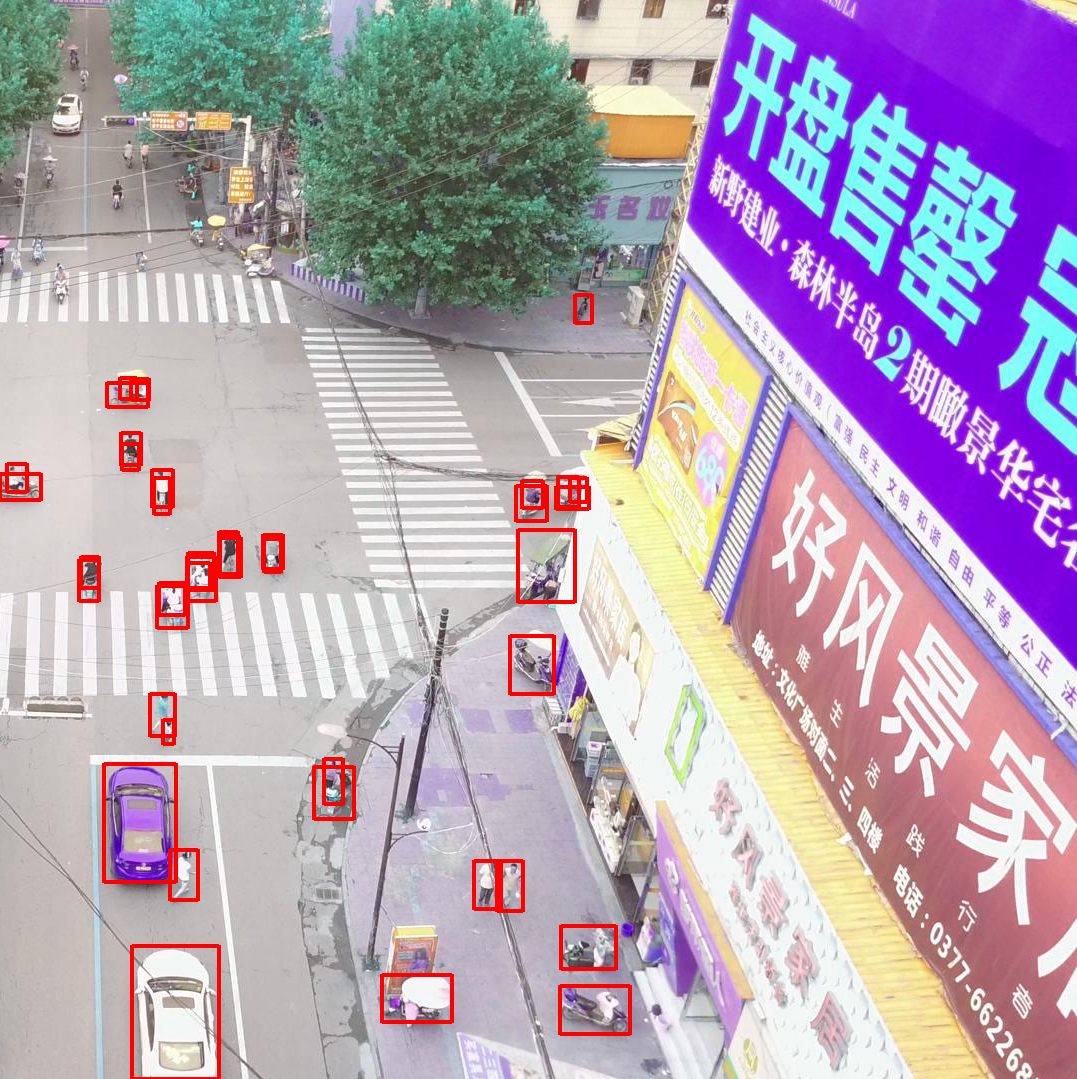

In [98]:
op = extra_aug.RandomPatch(patch_size=(640, 1200), pad_border=(0.1,0.1), overlap_thresh=0.3, ori_prob=0.0)
out = op(img, gt_bboxes, gt_labels)

ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
visualize_image_array(ret)

In [69]:
np.random.choice(90)

38

# randomUniformPatch

In [114]:
img.shape

(1080, 1920, 3)

[(0, 0, 986, 1003), (0, 55, 1024, 1079), (858, 0, 1882, 1003), (858, 55, 1882, 1079), (895, 0, 1919, 1003), (895, 55, 1919, 1079)]
4 (895, 0, 1919, 1003)


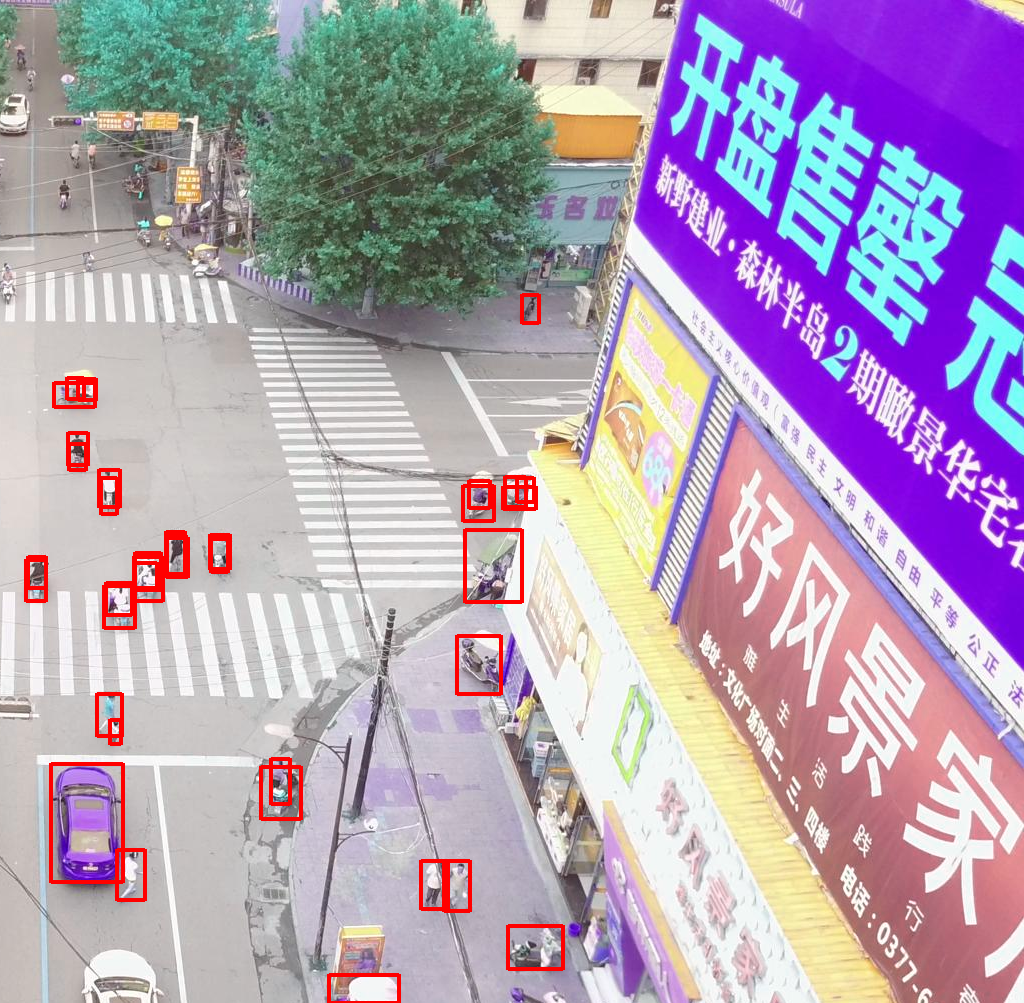

In [221]:
op = extra_aug.RandomUniformPatch(patch_sizes=(1024), gap=128, overlap_thresh=0.3, ori_prob=0.0)
out = op(img, gt_bboxes, gt_labels)

ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
visualize_image_array(ret)

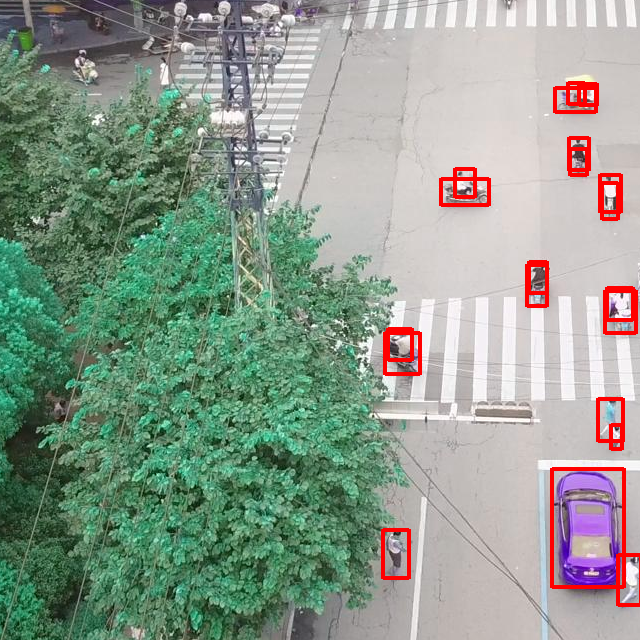

In [227]:
op = extra_aug.ExtraAugmentation(random_uniform_patch=dict(patch_sizes=(1024), gap=128, overlap_thresh=0.3, ori_prob=0.0),
                                 random_patch=dict(patch_size=(640, 1200), pad_border=(0.1,0.1), overlap_thresh=0.3, ori_prob=0.0))
out = op(img, gt_bboxes, gt_labels)

ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
visualize_image_array(ret)